# ECMM422 Machine Learning
## Course Assessment 1

This course assessment (CA) represents 40% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the [College website](https://www.exeter.ac.uk/students/administration/complaintsandappeals/academicmisconduct/). 
Students are **not allowed** to use Large Language Models (such as ChatGPT, Claude, Gemini, etc) to generate code for the CA.


**Submission information:**
1. do not change the name of this notebook, i.e. the notebook file has to be: `ca.ipynb`
2. do not add you name or student code in the notebook or in the file name
3. do not remove or delete or add any cell in this notebook
4. make sure to **remove** and **delete** the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave it in the cell you will fail the associated test
5. do not remove the function `save_history()` at the end of each cell. This function will save your edit operations on the code in the cell and will be used as proof of work, i.e. proof that you have been working on the questions assigned
6. work always in the cells provided when developing your implementation, i.e. do not work on another notebook or with programming environments that do not operate on this notebook.
7. when you are finished debugging **remove** all code that is not part of the function definition, i.e. leave only the clean function implementation in the cell: do not leave debugging `print` statements in the functions, and do not leave function invocations on test inputs
8. make sure that the execution of the cell **does not produce any type of output**: the execution of the cell should only define the desired functions
9. before the final submission run the function `check_and_prepare_for_submission()` in the last cell of the notebook: this function will create a zip archive called `ecmm422ca1.zip` which contains your notebook and the folder `proof_of_work`.
10. Submit only the file `ecmm422ca1.zip`


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- One or more hidden unit tests are going to evaluate if all desired properties of the required function are met. 
- If the function passes a test all the associated marks are awarded, if it fails 0 marks are awarded.
- If you make a typo error (e.g. misspelling a variable) this will likely causes a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.

Although the test use a hard fail/pass strategy to assign marks, the presence of several questions and several unit tests per question allows a fine grading. 

The Checkpoints are not graded by default, but might be used to assign additional marks in case the execution of the code obtains the desired results even when some tests might fail.

**Efficiency:** There is a cap of a few minutes on the execution of each cell and unit test. Make sure your code is not terribly inefficient (for example having a cell run for hours, e.g. using nested loops rather than NumPy functions that can work directly on  arrays), otherwise the execution of the cell/unit test will be interrupted and considered a failure. 

## Conventions and notation:

Do not assume any library is avaialble other than `matplotlib`, `numpy`, `scipy`.

Assume Python 3.8.

---

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

Make sure to convert numpy `matrix` objects to numpy arrays when returning a data matrix: only arrays are acceptable, not  numpy `matrix` objects. 

In the rest of the notebook, the term `vector` refers to a **one** dimensional numpy array. 

When we explicitly use the term `column vector` we mean a two dimensional array of shape `(n,1)`, when we explicitly use the term `row vector` we mean a two dimensional vector of shape `(1,n)`.

When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write often need to take in input and return as output such objects, i.e. numpy arrays, not python lists. Check the specifications for each required function in the question text. 

---

**Do not use library functions** to directly solve a question unless explicity instructed to do so. That is, when a required function can be implemented directly by a library function it is intended that the candidate should write their own implementation of the function: for example it the Question asks to implement a function to compute the `accuracy` one cannot just wrap the function `accuracy_score` from `sklearn.metrics` in a custom function; if a question asks to implement the K-nearest_neighbor algorithm one cannot just wrap the function `KNeighborsClassifier` from `sklearn.neighbors` in a custom function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy as sp
from submission_utils import save_history, check_and_prepare_for_submission
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Question 1

<div style="text-align: right"><b>[14 marks]</b></div>

**Generating and visualizing synthetic datasets**

---

**Objective:**
The objective of this section of the programming assignment is to implement functions to generate synthetic datasets for binary classification tasks. You will be implementing three functions: `make_positive_data`, `make_negative_data`, and `make_dataset`.
In addition you are to implement the functions `plot2d` and `plot3d` for visualizing data points in 2D and 3D space, respectively.

Positive data should be generated as follows:

- a total of `n_instances` will be generated, of which a fraction equal to `1-fraction_of_outliers` will be inliers and a fraction equal to `fraction_of_outliers` will be outliers.
- the inliers will be generated using the composition of two multivariate normal distributions.
- the inliers will be points in a vector space of dimension `n_informative_features+n_non_informative_features`, i.e. if `n_informative_features=2` and  `n_non_informative_features=3` the inliers will be points in a vector space of dimension 5.
- the first `n_informative_features` features will be generated according to a multivariate normal distribution with mean `[1,1,...,1]` (i.e. the ONE vector in n-dimensions), and standard deviation `std`
- the remaining `n_non_informative_features` features will be generated according to a multivariate normal distribution with zero mean and standard deviation `std`
- the outliers will be generated in a similar way, but where the first `n_informative_features` features will be generated according to a multivariate normal distribution with mean `[-1,-1,...,-1]` (i.e. the negative ONE vector in n-dimensions), and standard deviation `outliers_std`
- the remaining `n_non_informative_features` features for the outliers will be generated according to a multivariate normal distribution with zero mean and standard deviation `std`

Negative data does not have outliers and should be generated as follows:

- a total of `n_instances` will be generated
- the instances will be generated using the composition of two multivariate normal distributions.
- the instances will be points in a vector space of dimension `n_informative_features+n_non_informative_features`, i.e. if `n_informative_features=2` and  `n_non_informative_features=3` the instances will be points in a vector space of dimension 5.
- the first `n_informative_features` features will be generated according to a multivariate normal distribution with mean `[-1,-1,...,-1]` (i.e. the negative ONE vector in n-dimensions) and standard deviation `std`
- the remaining `n_non_informative_features` features will be generated according to a multivariate normal distribution with zero mean and standard deviation `std`

The function `make_dataset` will generate a total of `n_instances` of which half will be positive (including the outliers) and halp will be negative. 

---

**Instructions:**

1. **make_positive_data:**
   - Implement the function `make_positive_data` that generates synthetic data for the positive class.
   - Parameters:
     - `n_instances`: Total number of instances in the dataset.
     - `fraction_of_outliers`: Fraction of outliers to include in the dataset.
     - `n_informative_features`: Number of informative features.
     - `n_non_informative_features`: Number of non-informative features.
     - `std`: Standard deviation for generating data.
     - `outliers_std`: Standard deviation for generating outliers.
   - Returns:
     - `data_mtx`: Synthetic data matrix for the positive class.
<div style="text-align: right"><b>[4 marks]</b></div>

2. **make_negative_data:**
   - Implement the function `make_negative_data` that generates synthetic data for the negative class.
   - Parameters:
     - `n_instances`: Total number of instances in the dataset.
     - `n_informative_features`: Number of informative features.
     - `n_non_informative_features`: Number of non-informative features.
     - `std`: Standard deviation for generating data.
   - Returns:
     - `data_mtx`: Synthetic data matrix for the negative class.
<div style="text-align: right"><b>[3 marks]</b></div>

3. **make_dataset:**
   - Implement the function `make_dataset` that combines positive and negative data to create a dataset.
   - Parameters:
     - `n_instances`: Total number of instances in the dataset.
     - `fraction_of_outliers`: Fraction of outliers to include in the positive class.
     - `n_informative_features`: Number of informative features.
     - `n_non_informative_features`: Number of non-informative features.
     - `std`: Standard deviation for generating data.
     - `outliers_std`: Standard deviation for generating outliers.
   - Returns:
     - `data_mtx`: Combined synthetic data matrix for both classes.
     - `targets`: Array of binary labels (0 for negative class, 1 for positive class).
<div style="text-align: right"><b>[3 marks]</b></div>

4. **plot2d:**
   - Implement the function `plot2d` that visualizes a 2D dataset. Note, only the first two dimensions of `data_mtx` will be used for visualization.
   - Parameters:
     - `data_mtx`: 2D data matrix containing the data points.
     - `targets` (optional): Array of target labels corresponding to each data point. If provided, the points will be colored based on their target labels.
     - `title`: Title for the plot.
     - `size`: Size of the plot.
   - Returns:
     - A scatter plot visualizing the 2D dataset.
<div style="text-align: right"><b>[2 marks]</b></div>

5. **plot3d:**
   - Implement the function `plot3d` that visualizes a 3D dataset. Note, only the first three dimensions of `data_mtx` will be used for visualization.
   - Parameters:
     - `data_mtx`: 3D data matrix containing the data points.
     - `targets` (optional): Array of target labels corresponding to each data point. If provided, the points will be colored based on their target labels.
     - `title`: Title for the plot.
     - `size`: Size of the plot.
   - Returns:
     - A 3D scatter plot visualizing the 3D dataset.
<div style="text-align: right"><b>[2 marks]</b></div>
---

**Note:**
- You should use the `numpy` library for generating random data matrices.
- The function `make_dataset` should return the instances in random order, i.e. we should not have first all the positive instances followed by all the negative instances, but rather positive and negative instances should be randomly mixed. 
- You should use the `matplotlib` library for creating scatter plots.
- For `plot2d`, only the first two dimensions of `data_mtx` will be used for visualization.
- For `plot3d`, the first three dimensions of `data_mtx` will be used for visualization.
- If `targets` are provided, points should be colored according to their target labels.
- Make sure to set appropriate titles for the plots.

--- 

In [30]:
def make_positive_data(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std):
    # Calculation of the number of outliers and inliners
    n_inliners = int((1 - fraction_of_outliers) * n_instances)
    n_outliers = int(fraction_of_outliers * n_instances)
    # print(f'Normal: {n_inliners}, outliers {n_outliers}')

    # Generate inliners
    informative_inliners = np.random.normal(1, std, (n_inliners, n_informative_features))
    non_informative_inliners = np.random.normal(0, std, (n_inliners, n_non_informative_features))

    # print(f'Informative inliners: {informative_inliners.shape}, non-informative inliners: {non_informative_inliners.shape}')
    # print(f'{informative_inliners[:5]}')
    # print(f'{non_informative_inliners[:5]}')

    # Generate outliers
    informative_outliers = np.random.normal(-1, outliers_std, (n_outliers, n_informative_features))
    non_informative_outliers = np.random.normal(0, outliers_std, (n_outliers, n_non_informative_features))
    # print(f'Informative outliers: {informative_outliers.shape}, non-informative outliers: {non_informative_outliers.shape}')
    # print(f'{informative_outliers[:5]}')
    # print(f'{non_informative_outliers[:5]}')

    # Join all generated data
    all_positive_data = np.concatenate((np.hstack((informative_inliners, non_informative_inliners)),
                                    np.hstack((informative_outliers, non_informative_outliers))))
    # print(f'All data: {all_positive_data.shape}')
    # print(f'All data: {type(all_positive_data)}')
    return all_positive_data

def make_negative_data(n_instances, n_informative_features, n_non_informative_features, std):
    informative = np.random.normal(-1, std, (n_instances, n_informative_features))
    non_informative = np.random.normal(0, std, (n_instances, n_non_informative_features))
    # print(f'Informative: {informative.shape}, non-informative: {non_informative.shape}')
    # print(f'{informative[:5]}')
    # print(f'{non_informative[:5]}')

    all_negative_data = np.hstack((informative, non_informative))
    # print(all_negative_data.shape)
    # print(all_negative_data[:5])
    # print(type(all_negative_data))
    return all_negative_data
    

def make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std):
    amount_of_positives = n_instances // 2
    amount_of_negatives = n_instances - amount_of_positives
    positive_data = make_positive_data(n_instances=amount_of_positives, 
                                       fraction_of_outliers=fraction_of_outliers, 
                                       n_informative_features=n_informative_features, 
                                       n_non_informative_features=n_non_informative_features, 
                                       std=std, 
                                       outliers_std=outliers_std)
    negative_data = make_negative_data(n_instances=amount_of_negatives, 
                                       n_informative_features=n_informative_features, 
                                       n_non_informative_features=n_non_informative_features, 
                                       std=std)
    
    data_mtx = np.concatenate((positive_data, negative_data))
    targets = np.concatenate((np.ones(amount_of_positives), np.zeros(amount_of_negatives)))
    # print(f'Final data: {data_mtx.shape}')
    # print(f'Targets: {targets.shape}')
    # print(data_mtx[:5]), print(targets[:5])
    return data_mtx, targets

def plot2d(data_mtx, targets=None, title='', size=8):
    plt.figure(figsize=(size, size))
    if targets is None:
        plt.scatter(data_mtx[:, 0], data_mtx[:, 1])
    else: 
        plt.scatter(data_mtx[:, 0], data_mtx[:, 1], c=targets, cmap='viridis')
    plt.title(title)
    plt.show()  

def plot3d(data_mtx, targets=None, title='', size=8):
    fig = plt.figure(figsize=(size, size))
    ax = fig.add_subplot(111, projection='3d')
    if targets is None:
        plt.scatter(data_mtx[:, 0], data_mtx[:, 1], data_mtx[:, 2])
    else:
        plt.scatter(data_mtx[:, 0], data_mtx[:, 1], data_mtx[:, 2], c=targets, cmap='viridis')
    plt.title(title)
    ax.set_xlabel('Column 1')
    ax.set_ylabel('Column 2')
    ax.set_zlabel('Column 3')
    plt.show()

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
n_instances = 1000
fraction_of_outliers = 0.3
n_informative_features = 1
n_non_informative_features = 2
std = .5
outliers_std = 5

data_mtx, targets = make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std)

plot2d(data_mtx, targets, title='Data 2D', size=8)
plot3d(data_mtx, targets, title='Data 3D', size=8)
```

and check that you obtain a plot similar to:

<img src="img1b.png" width=40%>


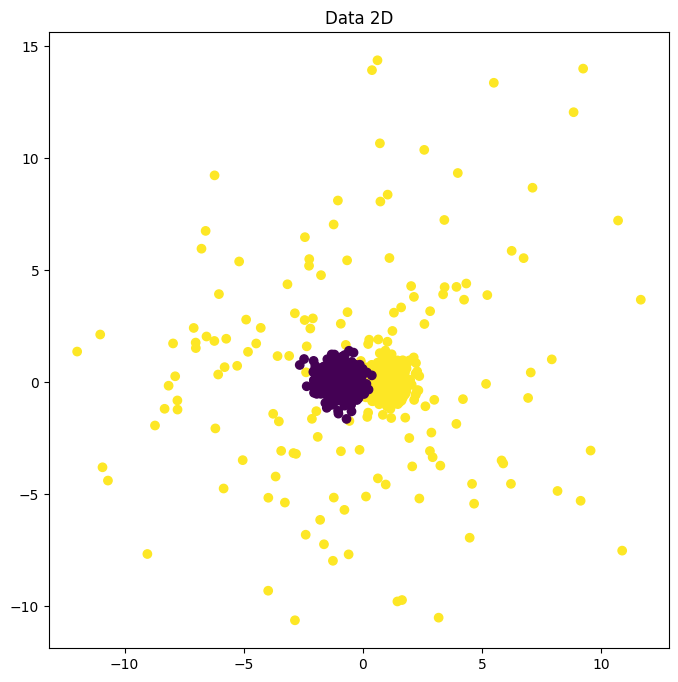

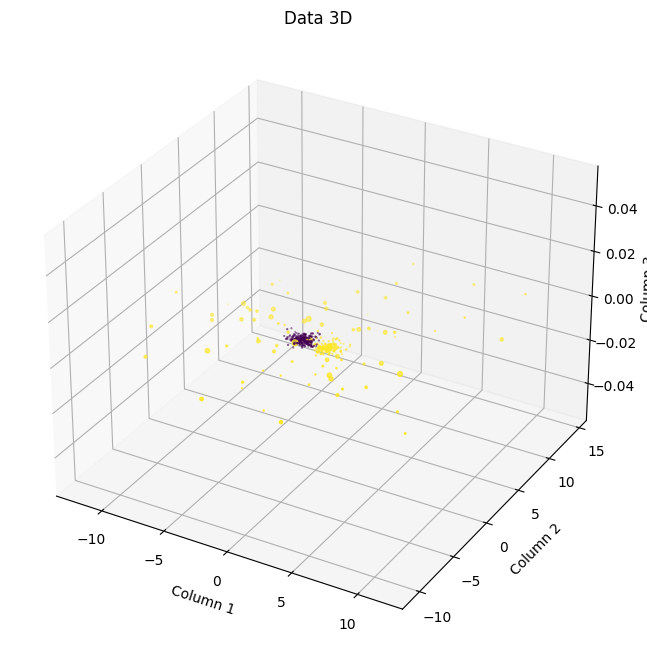

In [31]:
# Just run the following code, do not modify it
n_instances = 1000
fraction_of_outliers = 0.3
n_informative_features = 1
n_non_informative_features = 2
std = .5
outliers_std = 5

data_mtx, targets = make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std)

plot2d(data_mtx, targets, title='Data 2D', size=8)
plot3d(data_mtx, targets, title='Data 3D', size=8)

# Question 2

<div style="text-align: right"><b>[8 marks]</b></div>

**Data Rebalancing and Stratified Split**

---

**Objective:**
The objective of this section of the programming assignment is to implement two crucial functions for handling imbalanced datasets in machine learning: `rebalance` and `rebalanced_stratified_split`. These functions are designed to ensure that each class in the dataset has an equal number of instances and that the train-test split is done in a stratified manner, preserving the class distribution in both subsets.

---

**Instructions:**

1. **rebalance:**
   - Implement the function `rebalance` that rebalances the dataset by oversampling the minority classes to match the majority class.
   - Parameters:
     - `X`: Feature matrix.
     - `y`: Target vector.
   - Returns:
     - `new_X`: Rebalanced feature matrix.
     - `new_y`: Rebalanced target vector.
<div style="text-align: right"><b>[3 marks]</b></div>

2. **rebalanced_stratified_split:**
   - Implement the function `rebalanced_stratified_split` that performs a stratified split on the rebalanced dataset.
   - Parameters:
     - `X_orig`: Original feature matrix.
     - `y_orig`: Original target vector.
     - `test_size`: Size of the test set (default is 0.2).
     - `random_state`: Seed for random number generation (default is None).
   - Returns:
     - `X_train`: Feature matrix for the training set.
     - `X_test`: Feature matrix for the test set.
     - `y_train`: Target vector for the training set.
     - `y_test`: Target vector for the test set.
<div style="text-align: right"><b>[5 marks]</b></div>

---

**Note:**
- The `rebalance` function should oversample the minority classes to match the count of the majority class.
- The `rebalanced_stratified_split` function should first rebalance the dataset using the `rebalance` function and then perform a stratified split ensuring that class distribution is preserved in both training and testing sets.
- You should use the `numpy` library for array manipulations and random operations.
- You must write your own implementation and you cannot use the `train_test_split` function from `sklearn`.

--- 

In [59]:
def rebalance(X, y):
    unique_values, class_count = np.unique(y, return_counts=True)
    # print(f'Number of distinct classes: {len(class_count)}, {unique_values}')
    max_amount_of_class = np.max(class_count)
    # print(f'Maximum amount of class: {max_amount_of_class}')

    x_new, y_new = [], []

    for label in unique_values:
        label_indices = np.where(y == label)[0]
        oversampled_version = np.random.choice(label_indices, max_amount_of_class, replace=True)

        x_new.extend(X[oversampled_version])        
        y_new.extend(y[oversampled_version])

    # print(f'New data: {len(x_new)}, {len(y_new)}')
    return np.array(x_new), np.array(y_new)        


def rebalanced_stratified_split(X_orig, y_orig, test_size=0.2, random_state=None):
    # Empty train and test sets
    X_train, X_test, y_train, y_test = [], [], [], []

    # Rebalance function implementation
    x_rb, y_rb = rebalance(X=X_orig, y=y_orig)
    # Initialization of the random state
    np.random.seed(random_state)
    unique_values, class_count = np.unique(y_rb, return_counts=True)
    # print(class_count)
    class_test_sizes = np.round(class_count * test_size).astype(int)
    # print(f'Class test size: {class_test_sizes}')

    for class_label, test_size in zip(unique_values, class_test_sizes):
        class_indices = np.where(y_rb == class_label)[0]
        np.random.shuffle(class_indices)
        
        test_indices = class_indices[:test_size]
        train_indices = class_indices[test_size:]
        # print(f'Class: {class_label}, test: {len(test_indices)}, train: {len(train_indices)}')

        X_train.extend(x_rb[train_indices])
        X_test.extend(x_rb[test_indices])
        y_train.extend(y_rb[train_indices])
        y_test.extend(y_rb[test_indices])
    
    # print(X_train[:15], X_test[:15], y_train[:15], y_test[:15])
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

rebalanced_stratified_split(data_mtx, targets, test_size=0.2, random_state=42)

save_history()

In [55]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [56]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

# Question 3
<div style="text-align: right"><b>[10 marks]</b></div>

**Model Evaluation Metrics**

---

**Objective:**
The objective of this section of the programming assignment is to implement functions for evaluating classifier performance using various metrics, including accuracy score, confusion matrix, and predictive error estimation.

---

**Instructions:**

1. **accuracy_score:**
   - Implement the function `accuracy_score` that calculates the accuracy of a classifier's predictions.
   - Parameters:
     - `y_true`: Array of true labels.
     - `y_pred`: Array of predicted labels.
   - Returns:
     - `accuracy`: Accuracy score.
<div style="text-align: right"><b>[2 marks]</b></div>

2. **confusion_matrix:**
   - Implement the function `confusion_matrix` that computes the confusion matrix based on true labels and predicted labels.
   - Parameters:
     - `y_true`: Array of true labels.
     - `y_pred`: Array of predicted labels.
   - Returns:
     - `conf_matrix`: Confusion matrix.
<div style="text-align: right"><b>[4 marks]</b></div>

3. **predictive_error_estimate:**
   - Implement the function `predictive_performance_estimate` that estimates the predictive performance of a classifier as the average accuracy over a repetition of rebalanced splits.
   - Parameters:
     - `classifier`: Classifier object with `fit` and `predict` methods.
     - `data_mtx`: Feature matrix.
     - `targets`: Target vector.
     - `test_size`: Size of the test set for the rebalanced train test split.
     - `n_rep`: Number of repetitions (default is 3).
   - Returns:
     - `mean_score`: Mean accuracy score across repetitions.
     - `std_score`: Standard deviation of accuracy scores across repetitions.
<div style="text-align: right"><b>[4 marks]</b></div>
---

**Note:**
- The `accuracy_score` function should compute the ratio of correctly predicted instances to the total number of instances.
- The `confusion_matrix` function should construct a confusion matrix where rows represent predicted labels and columns represent true labels.
- You should use the `numpy` library for array manipulations and computations.
- You must write your own implementation and you cannot use the `accuracy_score` or `confusion_matrix` function from `sklearn`.

--- 


In [69]:
def accuracy_score(y_true, y_pred):
    num_of_correct_preds = np.sum(y_true == y_pred)
    total_preds = len(y_true)
    return num_of_correct_preds / total_preds

def confusion_matrix(y_true, y_pred):
    unique_values = np.unique(y_true)
    num_of_values = len(unique_values)
    conf_matrix = np.zeros((num_of_values, num_of_values)) 
    print(conf_matrix)

    for true_label, pred_label in zip(y_true, y_pred):
        true_index = np.where(unique_values == true_label)[0][0]
        pred_index = np.where(unique_values == pred_label)[0][0]
        conf_matrix[true_index, pred_index] += 1

    return conf_matrix.astype(int)
    

def predictive_performance_estimate(classifier, data_mtx, targets, test_size, n_rep=3):
    acc_scores = []
    for rep in range(n_rep):
        X_train, X_test, y_train, y_test = rebalanced_stratified_split(data_mtx, targets, test_size=test_size, random_state=rep)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'Accuracy for repetition {rep}: {acc*100}%')
        print(confusion_matrix(y_test, y_pred))
        acc_scores.append(acc)
    return np.mean(acc_scores), np.std(acc_scores)

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

# Question 4
<div style="text-align: right"><b>[12 marks]</b></div>

**Linear Classifier Implementation**

---

**Objective:**
The objective of this section of the programming assignment is to implement a linear classifier class called `LinearClassifier`. This classifier is capable of fitting a linear decision boundary to a given dataset and making predictions based on this boundary.

---

**Instructions:**

1. **LinearClassifier Class:**
   - Implement the `LinearClassifier` class with the following methods:
     - `__init__`: Constructor method to initialize the classifier object. It should take an optional parameter `threshold` (default is 0.5) representing the decision threshold.
     - `fit(X,y)`: Method to train the linear classifier using the given training data. It takes in input a data matrix `X` and a target vector `y`.
     - `predict(X)`: Method to predict labels for the given input data based on the trained classifier. It takes in input a data matrix `X`.

---

**Note:**
- The `fit` method should fit the linear classifier to the training data by estimating the weights (coefficients) and bias term of the decision boundary. 
- The `predict` method should make predictions based on the linear model's output, considering the decision threshold specified during initialization. 
- You should use the `numpy` library for array manipulations and linear algebra operations.
- You must write your own implementation and you cannot use the `SGDClassifier` or other functions/classes from `sklearn`.

--- 



In [ ]:
class LinearClassifier:
    def __init__(self, weights=None, bias=None, threshold=0.5):
        self.weights = None
        self.bias = None
        self.threshold = threshold
    
    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

# Question 5
<div style="text-align: right"><b>[12 marks]</b></div>

**K-Nearest Neighbors (KNN) Classifier Implementation**

---

**Objective:**
The objective of this section of the programming assignment is to implement a K-Nearest Neighbors (KNN) classifier class called `KNNClassifier`. This classifier is capable of making predictions based on the majority class of the K nearest neighbors.

---

**Instructions:**

1. **KNNClassifier Class:**
   - Implement the `KNNClassifier` class with the following methods:
     - `__init__`: Constructor method to initialize the classifier object. It should take an optional parameter `k` (default is 3) representing the number of neighbors to consider.
     - `fit(X,y)`: Method to fit the parameters of the model. It takes in input a data matrix `X` and a target vector `y`.
     - `euclidean_distance(x1, x2)`: Method to calculate the Euclidean distance between two data points. It takes in input two vectors.
     - `predict_prob_single(x)`: Method to predict the probabilities of each class label for a single data point. It takes in input one vector.
     - `predict(X)`: Method to predict the class labels for a given set of test data points. It takes in input a data matrix `X`.
   - Ensure that the classifier is capable of computing distances, finding nearest neighbors, and making predictions based on the majority class of the neighbors.

---

**Note:**
- The `euclidean_distance` method should calculate the Euclidean distance between two data points.
- The `predict_prob_single` method should predict the probabilities of each class label for a single data point based on its nearest neighbors in the training set.
- The `predict` method should make predictions for a set of test data points based on the majority class of their nearest neighbors in the training set.
- You should use the `numpy` library for array manipulations and mathematical operations.
- You must write your own implementation and you cannot use the `KNeighborsClassifier` or other functions/classes from `sklearn`.

--- 



In [71]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def eucledean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def predict_prob_single(self, x):
        pass

    def predict(self, X_test):
        return [self.predict_prob_single(x) for x in X_test]

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

# Question 6

<div style="text-align: right"><b>[15 marks]</b></div>

**Cost-Sensitive K-Nearest Neighbors (CostSensitiveKNN) Classifier Implementation**

---

**Objective:**
The objective of this programming assignment is to implement a Cost-Sensitive K-Nearest Neighbors (CostSensitiveKNN) classifier class called `CostSensitiveKNNClassifier`. This classifier is capable of making predictions based on the majority class of the K nearest neighbors while considering class costs.

---

**Instructions:**

1. **CostSensitiveKNNClassifier Class:**
   - Implement the `CostSensitiveKNNClassifier` class with the following methods:
     - `__init__`: Constructor method to initialize the classifier object. It should take an optional parameter `k` (default is 3) representing the number of neighbors to consider and an optional parameter `class_cost_matrix` (default is `[[0,1],[1,0]]`) representing the cost matrix.
     - `fit(X,y)`: Method to fit the parameters of the model. It takes in input a data matrix `X` and a target vector `y`.
     - `euclidean_distance(x1, x2)`: Method to calculate the Euclidean distance between two data points. It takes in input two vectors.
     - `predict_prob_single(x)`: Method to predict the probabilities of each class label for a single data point. It takes in input one vector.
     - `predict(X)`: Method to predict the class labels for a given set of test data points considering class costs. It takes in input a data matrix `X`.
   - Ensure that the classifier is capable of considering class costs during prediction.

---

**Note:**
- In the cost matrix the rows represent predicted labels and columns represent true labels.
- The `fit` method should store the training data (features and labels) for later use during prediction and compute class probabilities based on the training data.
- The `euclidean_distance` method should calculate the Euclidean distance between two data points.
- The `predict_prob_single` method should predict the probabilities of each class label for a single data point based on its nearest neighbors.
- The `predict` method should make predictions for a set of test data points considering class costs and the computed class probabilities.
- You should use the `numpy` library for array manipulations and mathematical operations.
- You must write your own implementation and you cannot use the `KNeighborsClassifier` or other functions/classes from `sklearn`.

--- 


In [ ]:
class CostSensitiveKNNClassifier:
    # YOUR CODE HERE
    raise NotImplementedError()

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

# Question 7
<div style="text-align: right"><b>[14 marks]</b></div>

**Group Weighted K-Nearest Neighbors (GroupKNN) Classifier Implementation**

---

**Objective:**
The objective of this programming assignment is to implement a variant of the K-Nearest Neighbors (KNN) algorithm called the Group Weighted KNN `GroupKNNClassifier`. 
Unlike the traditional KNN, which treats all features equally, GroupKNN divides the features into groups and assigns different weights to these groups. This approach allows the classifier to emphasize certain groups of features over others, which can be particularly useful in cases where some features are known to be more informative for the prediction task.

---

**Instructions:**

1. **GroupKNNClassifier Class:**
   - Implement the `GroupKNNClassifier` class with the following methods:
     - `__init__`: Constructor method to initialize the classifier object with parameters:
       - k: The number of nearest neighbors to consider for making predictions.
       - groups: A list of lists, where each sublist contains indices of the features belonging to a particular group. For example, if we have instances in a 5 dimensional space, we could assign `groups=[[0,3],[1],[2,4]]`. 
       - group_weights: A list containing the weights assigned to each group. The length of group_weights should match the number of groups. In the example above we could assign `group_weights = [0.7, 0.1, 0.3]`.
     - `fit(X,y)`: Method to fit the parameters of the model. It takes in input a data matrix `X` and a target vector `y`.
     - `euclidean_distance(x1, x2)`: Method to calculate the Euclidean distance between two data points. It takes in input two vectors.
     - `distance(x)`: Method to calculate the weighted distance between two data points considering different groups of features and their respective weights. It takes in input one vector.
     - `predict(X)`: Method to predict the class labels for a given set of test data points considering group-weighted distances. It takes in input a data matrix `X`.
   - Ensure that the classifier is capable of considering different groups of features and their respective weights during prediction.


---

**Note:**
- The `fit` method should store the training data (features and labels) for later use during prediction.
- The `euclidean_distance` method should calculate the Euclidean distance between two data points.
- The `distance` method should calculate the weighted distance between two data points considering different groups of features and their respective weights.
- The `predict` method should make predictions for a set of test data points considering group-weighted distances.
- You should use the `numpy` library for array manipulations and mathematical operations.
- You must write your own implementation and you cannot use the `KNeighborsClassifier` or other functions/classes from `sklearn`.

--- 

In [ ]:
class GroupKNNClassifier:
    # YOUR CODE HERE
    raise NotImplementedError()

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

# Question 8
<div style="text-align: right"><b>[15 marks]</b></div>

**Auto-Group Weighted K-Nearest Neighbors (AutoGroupsKNN) Classifier Implementation**

---

**Objective:**
The objective of this programming assignment is to implement an Auto-Group Weighted K-Nearest Neighbors (AutoGroupsKNN) classifier class called `AutoGroupsKNNClassifier`. This classifier automatically divides features into 2 groups based on how important the features are for the classification task, and assigns weights to these groups to emphasize their importance in the prediction. This approach is particularly useful in datasets where some features are more predictive of the outcome than others, and it aims to improve the classifier's performance by leveraging this information.

The idea is to partition the features into two groups: one is the important features and one is the less-important features. 
The candidate is free to define the notion of feature 'importance' as they see fit, provided that informative features are more likely to receive a greater weight than non-informative features. 
The classifier can be initialized with a parameter `param` that can be used to define a threshold notion to define the two groups.
The `weight` parameter is the weight that must be given to the less-important features, while `1-weight` is going to be the weight that must be given to the important features. If `weight=0` then the less-important features will not contribute in the distance notion of the KNNClassifier. 

---

**Instructions:**

1. **AutoGroupsKNNClassifier Class:**
   - Implement the `AutoGroupsKNNClassifier` class with the following methods:
     - `__init__`: Constructor method to initialize the classifier object. It should take an optional parameter `k` (default is 3) representing the number of neighbors to consider, an optional parameter `param` representing the feature weights threshold, and an optional parameter `weight` representing the weight assigned to one of the groups.
     - `fit(X,y)`: Method to train the AutoGroupsKNN classifier using the given data and automatically select feature groups based on the provided threshold. It takes in input a data matrix `X` and a target vector `y`.
     - `predict(X)`: Method to predict the class labels for a given set of test data points using the trained classifier. It takes in input a data matrix `X`.
   - Ensure that the classifier automatically selects feature groups and assigns weights to each group based on the given threshold and weight.

---

**Note:**
- The `fit` method should train the AutoGroupsKNN classifier by automatically selecting feature groups based on the provided feature weights threshold.
- The `predict` method should make predictions for a set of test data points using the trained classifier.
- You should use the `numpy` library for array manipulations and mathematical operations.
- You must write your own implementation and you cannot use the `KNeighborsClassifier` or other functions/classes from `sklearn`.

--- 

In [ ]:
class AutoGroupsKNNClassifier:
    # YOUR CODE HERE
    raise NotImplementedError()

save_history()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):

```python
params = np.arange(0, 150, 25)

classifier = KNNClassifier(k=3)
plot_predictive_error_estimate_vs_param(make_dataset_n_features_outliers, classifier, params, n_rep=30, title='KNN model performance decreases', xlabel='n_non_informative_features')

classifier = AutoGroupsKNNClassifier(k=3,param=.5,weight=.1)
plot_predictive_error_estimate_vs_param(make_dataset_n_features_outliers, classifier, params, n_rep=20, title='AutoGroupsKNN model performance does not decrease', xlabel='n_non_informative_features')
```

and check that you obtain a plot similar to:

<img src="img2b.png" width=40%>

and then execute:
```python
params = np.arange(2,20,4)

classifier = LinearClassifier()
plot_predictive_error_estimate_vs_param(make_dataset_outliers_std, classifier, params, n_rep=30, title='Linear model performance decreases', xlabel='outliers_std')

classifier = AutoGroupsKNNClassifier(k=3,param=.5,weight=.1)
plot_predictive_error_estimate_vs_param(make_dataset_outliers_std, classifier, params, n_rep=5, title='AutoGroupsKNN model performance does not decrease', xlabel='outliers_std')
```

and check that you obtain a plot similar to:

<img src="img3b.png" width=40%>


In [ ]:
#These functions are provided for you. You do not need to modify them in any way, just execute them.

def make_dataset_n_features_outliers(param):
    n_instances = 300
    fraction_of_outliers = 0.3
    n_informative_features = 2
    n_non_informative_features = param
    std = .75
    outliers_std = 2
    data_mtx, targets = make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std)
    return data_mtx, targets

def make_dataset_outliers_std(param):
    n_instances = 1000
    fraction_of_outliers = 0.3
    n_informative_features = 2
    n_non_informative_features = 10
    std = 1
    outliers_std = param
    data_mtx, targets = make_dataset(n_instances, fraction_of_outliers, n_informative_features, n_non_informative_features, std, outliers_std)
    return data_mtx, targets

def plot_predictive_error_estimate_vs_param(make_dataset_func, classifier, params, n_rep=30, title='', xlabel=''):
    acc_means = []
    acc_stds = []
    for param in params:
        data_mtx, targets = make_dataset_func(param)
        mean_acc, std_acc = predictive_performance_estimate(classifier, data_mtx, targets, test_size=.3, n_rep=n_rep)
        acc_means.append(mean_acc)
        acc_stds.append(std_acc)
    acc_means = np.array(acc_means)
    acc_stds = np.array(acc_stds)

    plt.figure(figsize=(10,4))
    plt.plot(params, acc_means, lw=2, c='k')
    plt.fill_between(params, acc_means-acc_stds,acc_means+acc_stds,color='b', alpha=.2)
    plt.xlabel(xlabel)
    plt.ylim(0.5,1)
    plt.grid()
    plt.title(title)
    plt.show()

In [ ]:
params = np.arange(0, 150, 25)

classifier = KNNClassifier(k=3)
plot_predictive_error_estimate_vs_param(make_dataset_n_features_outliers, classifier, params, n_rep=30, title='KNN model performance decreases', xlabel='n_non_informative_features')

classifier = AutoGroupsKNNClassifier(k=3,param=.5,weight=.1)
plot_predictive_error_estimate_vs_param(make_dataset_n_features_outliers, classifier, params, n_rep=30, title='AutoGroupsKNN model performance does not decrease', xlabel='n_non_informative_features')

In [ ]:
params = np.arange(2,20,4)

classifier = LinearClassifier()
plot_predictive_error_estimate_vs_param(make_dataset_outliers_std, classifier, params, n_rep=30, title='Linear model performance decreases', xlabel='outliers_std')

classifier = AutoGroupsKNNClassifier(k=3,param=.5,weight=.1)
plot_predictive_error_estimate_vs_param(make_dataset_outliers_std, classifier, params, n_rep=5, title='AutoGroupsKNN model performance does not decrease', xlabel='outliers_std')

---

In [ ]:
# Do not consider the next cell.
# You do not have to do anything for the next cell.

In [ ]:
check_and_prepare_for_submission()

---